In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
data["DESCR"]

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
boston = pd.DataFrame(data["data"], columns = data["feature_names"])
boston["price"] = data["target"]

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
def plot_scatter(col1, col2, xlabel,ylabel):
    plt.scatter(boston[col1], boston[col2])
    plt.title(col1 +  " vs " + col2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

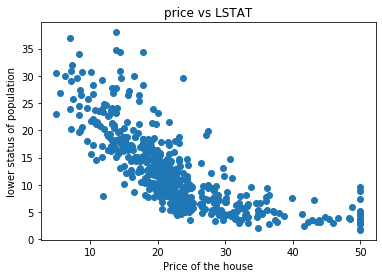

In [14]:
plot_scatter("price", "LSTAT", "Price of the house", "lower status of population")

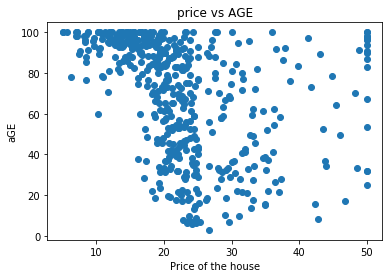

In [15]:
plot_scatter("price", "AGE", "Price of the house", "aGE")

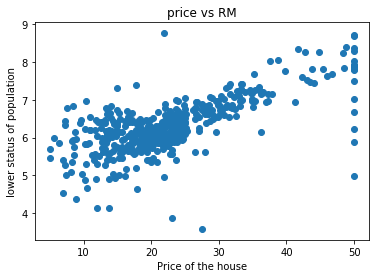

In [16]:
plot_scatter("price", "RM", "Price of the house", "lower status of population")

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [17]:
training_len = int(boston.shape[0] * 0.80)

train_x, train_y = boston.iloc[:training_len,:-1],boston.iloc[:training_len,-1]

In [20]:
test_x, test_y = boston.iloc[training_len:,:-1],boston.iloc[training_len:,-1]

In [30]:
train_x = scaler.fit_transform(train_x)

In [31]:
test_x = scaler.transform(test_x)

In [32]:
train_x

array([[0.00000000e+00, 1.80000000e-01, 7.34418420e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.62405717e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.62405717e-01, ...,
        5.53191489e-01, 9.87519166e-01, 6.34657837e-02],
       ...,
       [1.59940420e-01, 0.00000000e+00, 7.00277888e-01, ...,
        8.08510638e-01, 1.00000000e+00, 5.12969095e-01],
       [1.07782432e-01, 0.00000000e+00, 7.00277888e-01, ...,
        8.08510638e-01, 9.36246550e-01, 5.12693157e-01],
       [2.78694093e-01, 0.00000000e+00, 7.00277888e-01, ...,
        8.08510638e-01, 1.00000000e+00, 4.97792494e-01]])

In [33]:
train_x.shape

(404, 13)

In [34]:
test_x.shape

(102, 13)

In [43]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100,input_shape = (13,)))
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(1))

In [44]:
model.compile(optimizer="adam", loss = "mean_squared_error")

In [45]:
model.fit(train_x, train_y,epochs = 1,batch_size = 1)

Train on 404 samples
404/404 [==============================] - 1s 2ms/sample - loss: 109.8927


In [46]:
predictions = model.predict(test_x)

In [47]:
predictions

array([[ 9.226771 ],
       [11.352401 ],
       [ 9.784506 ],
       [17.441874 ],
       [12.449576 ],
       [12.616395 ],
       [ 1.9406486],
       [ 5.8700795],
       [-5.5362573],
       [ 7.144408 ],
       [-6.5689974],
       [ 2.2382038],
       [ 4.531567 ],
       [ 2.2438488],
       [-1.9654982],
       [ 6.235545 ],
       [18.992823 ],
       [17.7515   ],
       [15.153203 ],
       [ 2.560548 ],
       [ 2.2278006],
       [ 1.3504572],
       [ 3.7145216],
       [ 3.4611619],
       [ 6.9819427],
       [ 5.7170873],
       [ 8.249561 ],
       [ 9.183776 ],
       [10.786457 ],
       [10.334613 ],
       [ 9.400697 ],
       [ 8.711999 ],
       [ 6.2153754],
       [ 1.8835166],
       [ 0.7972751],
       [17.013552 ],
       [16.495106 ],
       [20.349936 ],
       [21.517214 ],
       [20.876492 ],
       [11.05944  ],
       [ 5.2762065],
       [18.297586 ],
       [20.984922 ],
       [20.659496 ],
       [17.453375 ],
       [ 7.02873  ],
       [21.01